<a href="https://colab.research.google.com/github/mikealeixogf/logic_fuzzy/blob/main/hard_aspirador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy

## Aplicação 3 da lógica nebulosa (fuzzy)
O problema consiste em definir a configuração de um aspirador de pó de acorto com o nível de dificuldade da superfície e da quantidade de sujeira.

* **Entrada (antecedentes):** 

> Superfície: qual o nível de dificuldade da superfície?

>> Universo (intervalo de valores nítidos/*crisp*):0 a 5

>> Conjunto difuso (valores difusos): fácil, moderada, dificil

> Sujeira: qual a quantidade de sujeira?

>> Conjunto difuso (valores difusos): leve, moderada, pesada

* **Saída (consequente):** 

> Sucção: qual o nível de succção que o aspirador deve ser configurado?

>> Universo (intervalo de valores nítidos/*crisp*):0% a 10%

>> Conjunto difuso (valores difusos): baixa, média, alta

### Regras de Decisões Difusas

> **SE** a superfície for fácil **E** a sujeira for leve, **ENTÃO** a sucção será baixa.

> **SE** a superfície for moderada **E** a sujeira for leve, **ENTÃO** a sucção será média.

> **SE** a superfície for dificil **ou** a sujeira for pesada, **ENTÃO** a sucção será alta.

> **SE** a superfície for moderada, **ENTÃO** a sucção será média.

In [43]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Cria as variáveis do problema
superficie = ctrl.Antecedent(np.arange(0,6,1),'superficie')
sujeira = ctrl.Antecedent(np.arange(0,6,1),'sujeira')
succao = ctrl.Consequent(np.arange(0,11,0.1),'succao')
# Cria automaticamente o mapeamento entre valores nítidos e difusos 
# Cria as funções de pertinência usando tipo triangular para a sucção
superficie['facil'] = fuzz.trapmf(superficie.universe,[0,0,1,2])
superficie['moderada'] = fuzz.trapmf(superficie.universe,[1,2,3,4])
superficie['dificil'] = fuzz.trapmf(superficie.universe,[3,4,5,5])


sujeira['leve'] = fuzz.trapmf(sujeira.universe,[0,0,1,2])
sujeira['moderada'] = fuzz.trapmf(sujeira.universe,[1,2,3,4])
sujeira['pesada'] = fuzz.trapmf(sujeira.universe,[3,4,5,5])



succao['baixa'] = fuzz.trimf(succao.universe,[0,2.5,5])
succao['media'] = fuzz.trimf(succao.universe,[2.5,5,7])
succao['alta'] = fuzz.trimf(succao.universe,[5,7,10])



### Mostrando graficamente as funções de partinência criadas

In [ ]:
superficie.view()
sujeira.view()
succao.view()

### Criando as regras de decisão difusas

In [48]:
#SE a superfície for fácil E a sujeira for leve, ENTÃO a sucção será baixa.

#SE a superfície for moderada E a sujeira for leve, ENTÃO a sucção será média.

#SE a superfície for dificil ou a sujeira for pesada, ENTÃO a sucção será alta.

#SE a superfície for moderada, ENTÃO a sucção será média.

regra1 = ctrl.Rule(superficie['facil'] & sujeira['leve'],succao['baixa'])
regra2 = ctrl.Rule(superficie['moderada'] & sujeira['leve'],succao['media'])
regra3 = ctrl.Rule(superficie['dificil'] | sujeira['pesada'],succao['alta'])
regra4 = ctrl.Rule(superficie['moderada'],succao['media'])


### Criando e simulando um controlador nebuloso

In [61]:
succao_ctrl = ctrl.ControlSystem([regra1,regra2,regra3,regra4])
succao_simulador = ctrl.ControlSystemSimulation(succao_ctrl)

# Entrando com alguns valores (exemplos variados)

succao_simulador.input['superficie']=3.5
succao_simulador.input['sujeira']=1.7

# Computando o resultado

succao_simulador.compute()
print(succao_simulador.output['succao'])

6.192176870748302


Mostrando graficamente o resultado

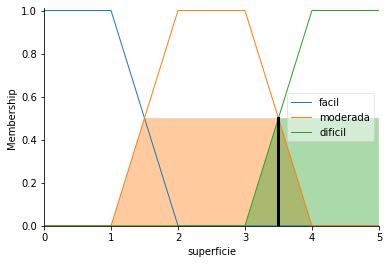

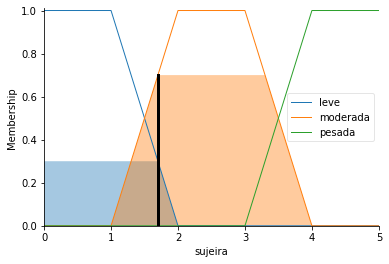

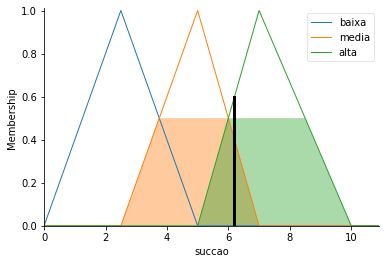

In [62]:
superficie.view(sim=succao_simulador)
sujeira.view(sim=succao_simulador)
succao.view(sim=succao_simulador)